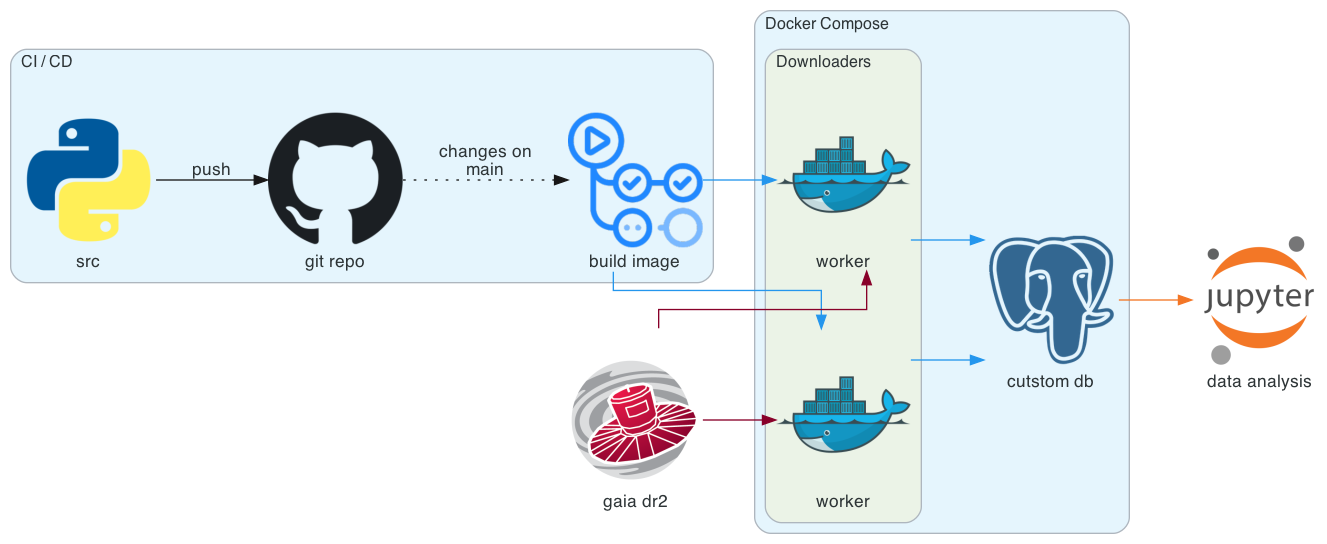

In [1]:
from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.onprem.ci import GithubActions
from diagrams.onprem.container import Docker
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.vcs import Github
from diagrams.programming.language import Python

from pathlib import Path

filename = 'services_diagram'
outformat = 'pdf'

figurespath = Path('../../figures')
diagram_attr = {
    'filename': filename,
    'outformat': outformat,
    'show': False,
    'graph_attr': {
        'pad': '0.0'
    }
}

with Diagram("", **diagram_attr) as diag:
    with Cluster("CI / CD"):
        code = Python("src")
        github = Github("git repo")
        githubci = GithubActions("build image")

        code >> Edge(label='push', color='#181717') >> github
        github >> Edge(label='changes on\nmain', color='#181717', style='dotted') >> githubci

    with Cluster("Docker Compose"):
        with Cluster("Downloaders"):
            downloaders = [
                Docker("worker"),
                Docker("worker")
            ]

        customdb = PostgreSQL("cutstom db")
        downloaders >> Edge(color='#2496ED') >> customdb
    
    githubci >> Edge(color='#2496ED') >> downloaders

    source = Custom("gaia dr2", str(figurespath / "esa-gaia-no-name-logo.png"))
    source >> Edge(color='#880029') >> downloaders
    
    analysis = Custom("data analysis", str(figurespath / "jupyter-logo.png"))
    customdb >> Edge(color='#F37626') >> analysis

filepath = Path(f"{filename}.{outformat}")
_ = filepath.rename(figurespath / filepath)

diag
